## 1. Credit card applications
<p>Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example.  In this project, I built an automatic credit card approval predictor using machine learning techniques, just like the real banks do.</p>
<p> The structure of this notebook is as follows:</p>
<ul>
<li>1. Loading and viewing the dataset</li>
<li>2. Preprocessing the dataset to ensure the machine learning model we choose can make good predictions</li>
<li>3. Conducting exploratory data analysis to build our intuitions</li>
<li>4. Building a machine learning model that can predict if an individual's application for a credit card will be accepted</li>

In [163]:
# Import pandas
import pandas as pd

# Load dataset
cc_apps = pd.read_csv("cc_approvals.data", header = None) # header = None because the original dataset contains no header

# Inspect data
cc_apps.head() # cc_apps is a dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## 2. Inspecting the applications
<p>From the first glance at the data, the dataset had a mixture of numerical and non-numerical features.</p>

In [164]:
# Print summary statistics
cc_apps_description = cc_apps.describe() # describe method only outputs summary statistics for numerical colunns
print(cc_apps_description)

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

# Print last 17 rows in the dataset to inspect missing values in the dataset
print(cc_apps.tail(17))

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-

## 3. Handling the missing values (part i)
<p>The dataset contained both numeric and non-numeric data (specifically data that are of float64,int64, and object types). Specifically, the features 2, 7, 10 and 14 contained numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contained non-numeric values.</p>
<p>In addition, the dataset had missing values labeled with '?', which could be seen in the last cell's output.</p>
<p>Now,I temporarily replaced these missing value question marks with NaN.</p>

In [165]:
# Import numpy
import numpy as np

# Inspect missing values in the dataset
print(cc_apps.tail(17))

# Replace the '?'s with NaN
cc_apps = cc_apps.replace('?',np.nan)
cc_apps = cc_apps.replace('',np.nan)
cc_apps = cc_apps.replace('None',np.nan)

# Inspect the missing values again
print(cc_apps.tail(17))

    0      1       2  3  4   5   6      7  8  9   10 11 12     13   14 15
673  ?  29.50   2.000  y  p   e   h  2.000  f  f   0  f  g  00256   17  -
674  a  37.33   2.500  u  g   i   h  0.210  f  f   0  f  g  00260  246  -
675  a  41.58   1.040  u  g  aa   v  0.665  f  f   0  f  g  00240  237  -
676  a  30.58  10.665  u  g   q   h  0.085  f  t  12  t  g  00129    3  -
677  b  19.42   7.250  u  g   m   v  0.040  f  t   1  f  g  00100    1  -
678  a  17.92  10.210  u  g  ff  ff  0.000  f  f   0  f  g  00000   50  -
679  a  20.08   1.250  u  g   c   v  0.000  f  f   0  f  g  00000    0  -
680  b  19.50   0.290  u  g   k   v  0.290  f  f   0  f  g  00280  364  -
681  b  27.83   1.000  y  p   d   h  3.000  f  f   0  f  g  00176  537  -
682  b  17.08   3.290  u  g   i   v  0.335  f  f   0  t  g  00140    2  -
683  b  36.42   0.750  y  p   d   v  0.585  f  f   0  f  g  00240    3  -
684  b  40.58   3.290  u  g   m   v  3.500  f  f   0  t  s  00400    0  -
685  b  21.08  10.085  y  p   e   h  1

## 4. Handling the missing values (part ii)
After replacing all the question marks with NaNs, I imput the missing valules with mean imputation. However, there were still 120 missing values in the dataset. 

In [167]:
# Impute the missing values with mean imputation
cc_apps.fillna(cc_apps.mean(), inplace=True) # before using .fillna(), we have to convert missing vaues to np.nan
# inplace = True means that the new value will replace old value
# Count the number of NaNs in the dataset to verify
sum(cc_apps.isnull()) # .isnull() detects missing value in array-like object 

120

## 5. Handling the missing values (part iii)
<p>I have successfully taken care of the missing values present in the numeric columns. There were still some missing values to be imputed for columns 0, 1, 3, 4, 5, 6 and 13. All of these columns contained non-numeric data and this is why the mean imputation strategy could not work here. This needed a different treatment. </p>
<p>Thus, I input these missing values with the most frequent values as present in the respective columns.</p>

In [168]:
# Impute the missing values in the non-numeric columns
# Iterate over each column of cc_apps
for col in cc_apps.columns: # Here, col refers to each colunn header
    # Check if the column is of object type
    if cc_apps[col].dtypes == 'object': 
        # Impute with the most frequent value
        # we extract the number of each value in that column by using .value_counts() and then obtain the 0th index because value count is in descending order
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0]) # use .value_counts().index[0] to get the most frequent value in a colunn

# Count the number of NaNs in the dataset and print the counts to verify
print(sum(cc_apps.isnull().sum()))            

0


## 6. Preprocessing the data (part i)
<p>The missing values were successfully handled.</p>
<p>There was still some minor but essential data preprocessing needed before proceeding towards building the machine learning model. The task was divided into three main tasks:</p>
<ol>
<li>Converting the non-numeric data into numeric</li>
<li>Splitting the data into train and test sets </li>
<li>Scaling the feature values to a uniform range</li>
</ol>
<p>First, I converted all the non-numeric values into numeric ones because not only it would result in a faster computation but also many machine learning models (like XGBoost) (and especially the ones developed using scikit-learn) would require the data to be in a strictly numeric format. Label encoding was used to convert non-numeric values to numeric values.</p>

In [169]:
# Convert the non-numeric values to numeric ie. label encoding
# Import LabelEncoder 
from sklearn.preprocessing import LabelEncoder
#Instantiate LabelEncoder
le = LabelEncoder()
# Iterate over all the values of each column and extract their dtypes
for col in cc_apps.columns: # col is 0,1,2,...,15 
    # Compare if the dtype is object
    if cc_apps[col].dtypes =='object': # cc_apps[col] is a series  
    # Use LabelEncoder to do the numeric transformation
        cc_apps[col]=le.fit_transform(cc_apps[col])
# Print out column headers
print(cc_apps.head())
print(cc_apps.columns.to_numpy()) # to_numpy() converts dataframe to NumPy array

   0    1      2   3   4   5   6     7   8   9   10  11  12  13   14  15
0   1  156  0.000   2   1  13   8  1.25   1   1   1   0   0  68    0   0
1   0  328  4.460   2   1  11   4  3.04   1   1   6   0   0  11  560   0
2   0   89  0.500   2   1  11   4  1.50   1   0   0   0   0  96  824   0
3   1  125  1.540   2   1  13   8  3.75   1   1   5   1   0  31    3   0
4   1   43  5.625   2   1  13   8  1.71   1   0   0   0   2  37    0   0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


## 7. Splitting the dataset into train and test sets
<p>Label encoding has successfully converted all the non-numeric values to numeric ones.</p>
<p>I splitted the data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing.</p>
<p>Then I performed feature selection to drop features like "DriversLicense" and "ZipCode" that were not as important as the other features in the dataset for predicting credit card approvals.</p>

In [170]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13 and convert the DataFrame to a NumPy array
cc_apps = cc_apps.drop([11, 13], axis=1)
cc_apps_numpy = cc_apps.to_numpy()

# Segregate features and labels into separate variables
X,y = cc_apps_numpy[:,0:13] , cc_apps_numpy[:,13]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)


## 8. Preprocessing the data (part ii)
<p>The data was split into two separate sets - train and test sets respectively. I was only left with one final preprocessing step of scaling before I could fit a machine learning model to the data. </p>
<p>Before rescaling values, I tried to understand what each value meant. For exmaple, the credit score of a person was their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person was considered to be. Thus, a <code>CreditScore</code> of 1 was the highest since I rescaled all the values to the range of 0-1.</p>

In [171]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
# MinMaxScaler rescales the data set such that all feature values are in the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1)) 
rescaledX_train = scaler.fit_transform(X_train) # rescaledX_train is a numpy array
rescaledX_test = scaler.fit_transform(X_test) # rescaledX_test is a numpy array

## 9. Checking Correlations Between Features
Seaborn correlation heatmap below showed there were some correlations in the data. For example, feature 1 & 7 were positively correlated and same as feature 8 & 9. Because of this correlation, I took advantage of the fact that generalized linear models performed well in these cases so a Logistic Regression model was used.

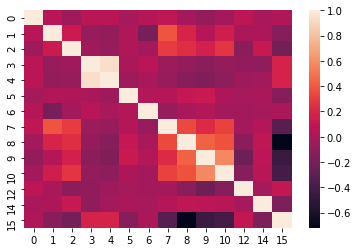

In [172]:
# Check correlations between features
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cc_apps.corr());

## 10. Fitting a logistic regression model to the train set
<p>Essentially, predicting if a credit card application would be approved or not was a classification task. <a href="http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names">According to UCI</a>, our dataset contained more instances that correspond to "Denied" status than instances corresponding to "Approved" status. Specifically, out of 690 instances, there were 383 (55.5%) applications that got denied and 307 (44.5%) applications that got approved. </p>
<p>This gave us a benchmark. A good machine learning model should be able to accurately predict the status of the applications with respect to these statistics.</p>

In [173]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)

LogisticRegression()

## 11. Making predictions and evaluating performance
<p>I evaluated my model on the test set with respect to classification accuracy and confusion matrix. In the case of predicting credit card applications, it was equally important to see if the machine learning model was able to predict the approval status of the applications as denied that originally got denied. If the model performed well in this aspect, it might end up approving the application that should not have been approved. The confusion matrix helped me to view our model's performance from these aspects.</p>

<p>The results showed that the accuracy score for the logistic regression classifier is 0.84, indicating that approximately 84% of the data instances were correctly predicted by the model, which was pretty high. In addition, confusion matrix demonstrated that TN = 92 , FP = 11 , FN = 26, TP = 99. </p>

In [174]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

# Print the confusion matrix of the logreg model
c = confusion_matrix(y_test,y_pred) 
print(c)

Accuracy of logistic regression classifier:  0.8377192982456141
[[92 11]
 [26 99]]


## 12. Grid searching and making the model perform better 
<p>The confusion matrix and the accuracy score showed that the model was pretty good! It was able to yield an accuracy score of almost 84%. For the confusion matrix, the first element of the of the first row of the confusion matrix denoted the true negatives meaning the number of negative instances (denied applications) predicted by the model correctly. And the last element of the second row of the confusion matrix denoted the true positives meaning the number of positive instances (approved applications) predicted by the model correctly.</p>

<p>To see if the model could do better, I performed a grid search of the model parameters to improve the model's ability to predict credit card approvals.</p>

<p><a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">scikit-learn's implementation of logistic regression</a> consisted of different hyperparameters but I only grid searched over the following two for simplification:</p>
<ul>
<li>tol</li>
<li>max_iter</li>
</ul>

In [175]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

## 13. Finding the best performing model
<p>I have defined the grid of hyperparameter values and converted them into a single dictionary format which GridSearchCV() expected as one of its parameters. I then began the grid search to see which values perform best.</p>
<p>I then instantiated GridSearchCV() with our earlier logreg model with all the data I had. Instead of passing train and test sets separately, I supplied X (scaled version) and y. I also instructed GridSearchCV() to perform a cross-validation of five folds.</p>
<p>The project was ended by storing the best-achieved score and the respective best parameters.</p>

In [176]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5) # cv=5 indicates five folds of cross validations

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X) 

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX, y) 

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.850725 using {'max_iter': 100, 'tol': 0.01}
